#Activity 1


In [2]:
def iterative_deeping_dfs(start,target):
    depth = 1
    bottom_reached = False
    while not bottom_reached:
        result,bottom_reached=iterative_deeping_dfs_rec(start,target,0,depth)
        if result is not None:
            return result
        depth*=2
        print("Increasing depth to "+str(depth))

    return None
def iterative_deeping_dfs_rec(node,target,current_depth,max_depth):
    print("Visiting Node "+str(node["value"]))
    if node["value"] == target:
        print("Found the node  we're looking for!")
        return node,True
    if current_depth == max_depth:
        print("Current maxium")

        if len(node["children"]) > 0:
          return None,False
        else:
          return None,True

    bottom_reached = True
    for i in range(len(node["children"])):
      result, bottom_reached_rec = iterative_deeping_dfs_rec(node["children"][i],target,current_depth + 1,max_depth)

      if result is not None:
        return result,True
      bottom_reached = bottom_reached and bottom_reached_rec

    return None,bottom_reached

start = {
    "value": 0, "children": [
        { "value" : 1, "children": [
            {"value":3, "children": []},
            {"value":4, "children": []},
        ]}, {
            "value":2, "children": [
                {"value":5, "children": []},
                {"value":6, "children": []},
            ]
        }
    ]
}

print(iterative_deeping_dfs(start,6)["value"])

Visiting Node 0
Visiting Node 1
Current maxium
Visiting Node 2
Current maxium
Increasing depth to 2
Visiting Node 0
Visiting Node 1
Visiting Node 3
Current maxium
Visiting Node 4
Current maxium
Visiting Node 2
Visiting Node 5
Current maxium
Visiting Node 6
Found the node  we're looking for!
6


#Lab task 01


Path: Arad -> Sibiu -> Fagaras -> Bucharest
Total cost: 450


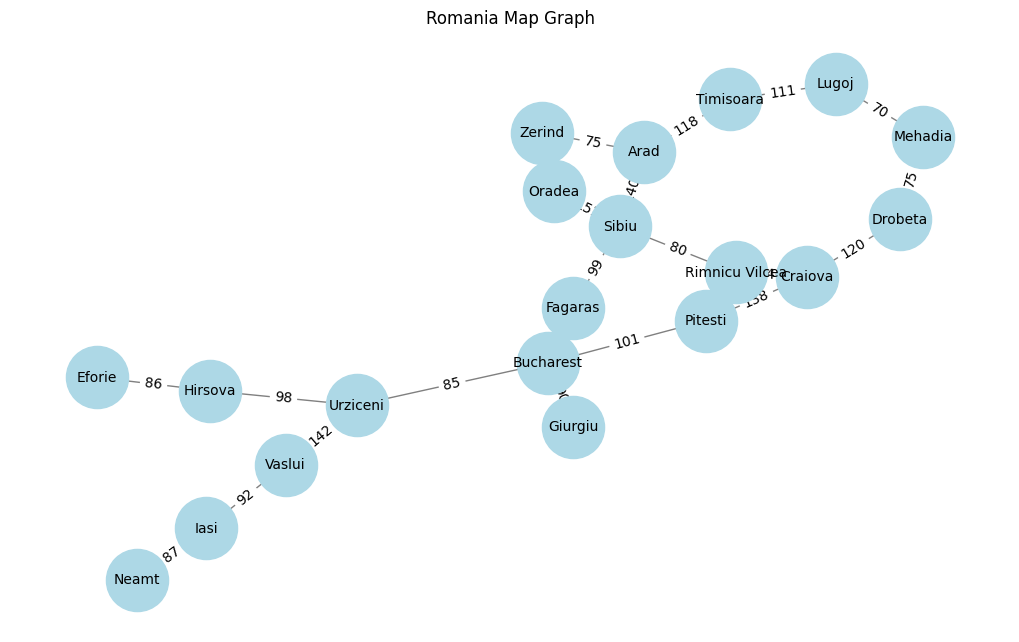

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class SearchGraph:
    def __init__(self):
        self.network = nx.Graph()

    def add_connection(self, city1, city2, distance):
        self.network.add_edge(city1, city2, weight=distance)

    def depth_limited_search(self, current_city, target_city, depth_limit, current_path, total_distance):
        if depth_limit < 0:
            return None
        current_path.append(current_city)
        if current_city == target_city:
            return current_path, total_distance
        for neighbor in self.network.neighbors(current_city):
            if neighbor not in current_path:
                edge_distance = self.network[current_city][neighbor]['weight']
                result = self.depth_limited_search(neighbor, target_city, depth_limit - 1, current_path[:], total_distance + edge_distance)
                if result is not None:
                    return result
        return None

    def iterative_deepening_search(self, start_city, target_city, max_depth):
        for depth in range(max_depth):
            result = self.depth_limited_search(start_city, target_city, depth, [], 0)
            if result is not None:
                return result
        return None

# Create the graph representing Romania map
romania_graph = SearchGraph()
romania_graph.add_connection("Arad", "Zerind", 75)
romania_graph.add_connection("Arad", "Timisoara", 118)
romania_graph.add_connection("Arad", "Sibiu", 140)
romania_graph.add_connection("Zerind", "Oradea", 71)
romania_graph.add_connection("Oradea", "Sibiu", 151)
romania_graph.add_connection("Timisoara", "Lugoj", 111)
romania_graph.add_connection("Lugoj", "Mehadia", 70)
romania_graph.add_connection("Mehadia", "Drobeta", 75)
romania_graph.add_connection("Drobeta", "Craiova", 120)
romania_graph.add_connection("Craiova", "Rimnicu Vilcea", 146)
romania_graph.add_connection("Craiova", "Pitesti", 138)
romania_graph.add_connection("Rimnicu Vilcea", "Sibiu", 80)
romania_graph.add_connection("Rimnicu Vilcea", "Pitesti", 97)
romania_graph.add_connection("Sibiu", "Fagaras", 99)
romania_graph.add_connection("Fagaras", "Bucharest", 211)
romania_graph.add_connection("Pitesti", "Bucharest", 101)
romania_graph.add_connection("Bucharest", "Urziceni", 85)
romania_graph.add_connection("Bucharest", "Giurgiu", 90)
romania_graph.add_connection("Urziceni", "Hirsova", 98)
romania_graph.add_connection("Hirsova", "Eforie", 86)
romania_graph.add_connection("Urziceni", "Vaslui", 142)
romania_graph.add_connection("Vaslui", "Iasi", 92)
romania_graph.add_connection("Iasi", "Neamt", 87)

# Run IDDFS
start_city = "Arad"
target_city = "Bucharest"
max_search_depth = 10
search_result = romania_graph.iterative_deepening_search(start_city, target_city, max_search_depth)
if search_result:
    path_taken, total_cost = search_result
    print(f"Path: {' -> '.join(path_taken)}")
    print(f"Total cost: {total_cost}")
else:
    print("No path found within depth limit.")

# Draw the graph
plt.figure(figsize=(10, 6))
layout_position = nx.spring_layout(romania_graph.network)
nx.draw(romania_graph.network, layout_position, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
edge_labels = {(city1, city2): data['weight'] for city1, city2, data in romania_graph.network.edges(data=True)}
nx.draw_networkx_edge_labels(romania_graph.network, layout_position, edge_labels=edge_labels)
plt.title("Romania Map Graph")
plt.show()


#Lab task 02


In [5]:
def is_valid(x, y, board):
    return 0 <= x < len(board) and 0 <= y < len(board[0])

def find_words(board, dictionary):
    rows, cols = len(board), len(board[0])
    valid_words = set()
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    def dfs(x, y, visited, word):
        if word in dictionary:
            valid_words.add(word)

        if len(word) >= 8:
            return

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, board) and (nx, ny) not in visited:
                dfs(nx, ny, visited | {(nx, ny)}, word + board[nx][ny])

    for x in range(rows):
        for y in range(cols):
            dfs(x, y, {(x, y)}, board[x][y])

    return [word for word in valid_words if 5 <= len(word) <= 8]

# Define the board and dictionary
board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

dictionary = {"START", "NOTE", "SAND", "STONED"}

# Find and print valid words
valid_words = find_words(board, dictionary)
print("Valid words:", valid_words)

Valid words: ['STONED']
